<a href="https://colab.research.google.com/github/TAFIMnoor/Understanding-Bengali-NLP-LSTM-XGBoost-MultinomialNB/blob/main/Classify_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import json
dataPath='/content/drive/MyDrive/banglaData/data.json'
with open(dataPath, encoding='utf-8') as dataPath:
    data=json.load(dataPath)


In [3]:
data[1:2]

# a[start:stop]  ~ items start through stop-1
# a[start:]      ~ items start through the rest of the array
# a[:stop]       ~ items from the beginning through stop-1
# a[:]           ~ a copy of the whole array

[{'author': 'অনলাইন ডেস্ক',
  'category': 'sports',
  'category_bn': 'খেলা',
  'published_date': '০৪ জুলাই ২০১৩, ২৩:০৯',
  'modification_date': '০৪ জুলাই ২০১৩, ২৩:১১',
  'tag': ['টেনিস'],
  'comment_count': 0,
  'title': 'সেমিফাইনাল বাধাও পেরিয়ে গেলেন লিসিকি',
  'url': 'http://www.prothom-alo.com/sports/article/19028',
  'content': 'এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যেন নেমেছেন সাবিনা লিসিকি। চতুর্থ রাউন্ডের লড়াইয়ে সেরেনা উইলিয়ামসকে হারিয়ে শুরু করেছিলেন স্বপ্নযাত্রা। কোয়ার্টার ফাইনালে কাইয়া কানেপিকে হারাতে খুব একটা বেগ পেতে হয়নি। তবে সেমিফাইনালে কঠিন প্রতিপক্ষের মুখেই পড়তে হয়েছিল লিসিকিকে। র্যাঙ্কিংয়ের চার নম্বরে থাকা আগ্নিয়েস্কা রাদভানস্কাই ছিলেন আজকের ম্যাচের ফেবারিট। কিন্তু অঘটনের উইম্বলডনে উল্টোটাই ঘটবে, এটাই যেন স্বাভাবিক। হলোই তা-ই। উত্তেজনাপূর্ণ সেমিফাইনালে ৬-৪, ২-৬, ৯-৭ গেমের জয় দিয়ে লিসিকি প্রথমবারের মতো পা রাখলেন উইম্বলডনের ফাইনালে।প্রথম সেটে ৬-৪ গেমের জয় দিয়ে শুরুটা দারুণভাবে করেছিলেন জার্মান তারকা লিসিকি। দ্বিতীয় সেটে ঘুরে দাঁড়ান রাদভানস্কা। খেলা

# **Tokenization**

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer(num_words = 1000)   #maximum word limit 1000
tokenizer.fit_on_texts(data[6]['content']) # fit sentence


In [5]:
word_index = tokenizer.word_index
print(word_index) # word index of tokenized sentence
#tokenizer.word_counts # word count of tokenized sentence

{'র': 1, 'া': 2, 'ে': 3, '্': 4, 'ন': 5, 'ি': 6, 'ব': 7, 'ল': 8, 'ত': 9, 'য': 10, 'প': 11, 'ম': 12, 'ক': 13, 'স': 14, 'দ': 15, '়': 16, 'ী': 17, 'জ': 18, 'গ': 19, 'ু': 20, 'আ': 21, 'ো': 22, 'হ': 23, 'চ': 24, 'ট': 25, 'ও': 26, 'এ': 27, 'ধ': 28, '।': 29, 'ই': 30, 'শ': 31, 'ষ': 32, 'ণ': 33, 'ভ': 34, 'উ': 35, 'থ': 36, 'ঙ': 37, 'খ': 38, 'ছ': 39, 'ং': 40, 'ঁ': 41, 'ৌ': 42, '‘': 43, '’': 44, 'ূ': 45, 'ৃ': 46, 'ঠ': 47, 'অ': 48, 'ঞ': 49, '২': 50, 'ফ': 51, 'ঈ': 52, 'ড': 53}


In [6]:
tokenizer.get_config()

{'num_words': 1000,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 1429,
 'word_counts': '{"\\u09af": 38, "\\u09c1": 19, "\\u0995": 37, "\\u09cd": 83, "\\u09a4": 43, "\\u09b0": 102, "\\u09be": 102, "\\u09b7": 9, "\\u099f": 12, "\\u09c7": 84, "\\u09ac": 54, "\\u099c": 21, "\\u09bf": 64, "\\u098f": 11, "\\u09b8": 35, "\\u09aa": 38, "\\u09a7": 11, "\\u09a8": 71, "\\u09b9": 14, "\\u0993": 12, "\\u09bc": 29, "\\u0999": 5, "\\u0997": 21, "\\u09ae": 38, "\\u09c0": 29, "\\u0989": 8, "\\u09a6": 30, "\\u0996": 5, "\\u0986": 16, "\\u09b2": 44, "\\u099b": 5, "\\u0982": 5, "\\u09b6": 10, "\\u09cb": 15, "\\u0964": 11, "\\u09c3": 2, "\\u099a": 14, "\\u0981": 3, "\\u09a3": 9, "\\u09a0": 2, "\\u09cc": 3, "\\u09ad": 9, "\\u0985": 2, "\\u09a5": 8, "\\u2018": 3, "\\u0987": 11, "\\u2019": 3, "\\u09c2": 3, "\\u099e": 2, "\\u09e8": 1, "\\u09ab": 1, "\\u0988": 1, "\\u09a1": 1}',
 'word_docs': '{"\\u09af": 38, "\\u

In [7]:
from numpy.lib.arraysetops import unique

category_list = []
filterData = []
garbageCategory = []
garbageContent = []
for i in range(len(data)):
    category = data[i]['category']
    category_list.append(category);
    if category == '-1' or category == '22221' or category == 'we-are' :
      garbageCategory.append(data[i])
      continue
    if data[i]['content'] == '-1' :
      garbageContent.append(data[i])
      continue
    filterData.append(data[i])

print(len(garbageCategory))
print(len(garbageCategory))
len(filterData)

3133
3133


434784

In [8]:

new_category_list = []

for i in range(len(filterData)):
    new_category_list.append(filterData[i]['category'])


unique_category_list = np.unique(np.array(new_category_list))
print(len(unique_category_list))
print(unique_category_list)


27
['AskEditor' 'bangladesh' 'bondhushava' 'chakri-bakri' 'demo-content'
 'diverse' 'durporobash' 'economy' 'education' 'entertainment' 'events'
 'international' 'kishoralo' 'life-style' 'mpaward1' 'nagorik-kantho'
 'northamerica' 'onnoalo' 'opinion' 'pachmisheli' 'protichinta' 'roshalo'
 'special-supplement' 'sports' 'tarunno' 'technology' 'trust']


In [9]:
from collections import Counter
Counter(new_category_list)

Counter({'bangladesh': 232495,
         'sports': 49010,
         'technology': 12113,
         'entertainment': 30464,
         'international': 30855,
         'economy': 17245,
         'life-style': 10852,
         'opinion': 15698,
         'education': 9721,
         'onnoalo': 2701,
         'pachmisheli': 3443,
         'AskEditor': 1,
         'roshalo': 2604,
         'durporobash': 7401,
         'events': 2,
         'kishoralo': 508,
         'special-supplement': 859,
         'demo-content': 2,
         'trust': 443,
         'northamerica': 6990,
         'protichinta': 170,
         'bondhushava': 990,
         'mpaward1': 17,
         'diverse': 2,
         'tarunno': 40,
         'chakri-bakri': 75,
         'nagorik-kantho': 83})

In [10]:

category_count = []
for each_category in unique_category_list:
    count_of_each_category = category_list.count(each_category)
    category_count.append((each_category,count_of_each_category))

category_count.sort();
category_count


[('AskEditor', 1),
 ('bangladesh', 232504),
 ('bondhushava', 990),
 ('chakri-bakri', 75),
 ('demo-content', 2),
 ('diverse', 2),
 ('durporobash', 7402),
 ('economy', 17245),
 ('education', 9721),
 ('entertainment', 30466),
 ('events', 2),
 ('international', 30856),
 ('kishoralo', 508),
 ('life-style', 10852),
 ('mpaward1', 17),
 ('nagorik-kantho', 83),
 ('northamerica', 6990),
 ('onnoalo', 2702),
 ('opinion', 15699),
 ('pachmisheli', 3443),
 ('protichinta', 170),
 ('roshalo', 2604),
 ('special-supplement', 859),
 ('sports', 49012),
 ('tarunno', 40),
 ('technology', 12116),
 ('trust', 443)]

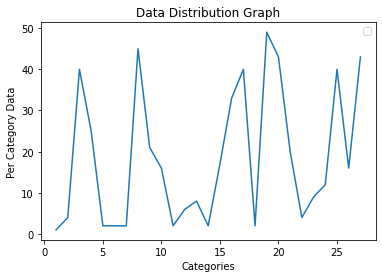

In [11]:
import matplotlib.pyplot as plt
from google.colab import files

sections = []
labels = []
 
for each_category in category_count:
    sections.append(each_category[1]%50)

for i in range (27):
    labels.append(i+1);
 
plt.plot(labels,sections)

plt.xlabel("Categories")
plt.ylabel("Per Category Data")
plt.title("Data Distribution Graph")
plt.legend()
plt.show()


In [12]:
selected_category_list = []

for i in category_count:
     if( i[1] > 2500 ):
         selected_category_list.append(i[0])

print(len(selected_category_list))
selected_category_list

14


['bangladesh',
 'durporobash',
 'economy',
 'education',
 'entertainment',
 'international',
 'life-style',
 'northamerica',
 'onnoalo',
 'opinion',
 'pachmisheli',
 'roshalo',
 'sports',
 'technology']

# **Target & Features**

In [13]:

features = []
target = []


for i in filterData:
    if i['category'] in selected_category_list:
        if target.count(i['category']) < 2500:
          features.append(i['content'])
          target.append(i['category'])


print(len(features))
print(len(target))

# Check dataset
print("Category: --",target[-1])
print("Content: --",features[-1])


35000
35000
Category: -- onnoalo
Content: -- সাইকেলতাহমিনা বেগম স্বপ্নে দেখেন, লিজার বাবা একটা নতুন সাইকেল নিয়ে ঢুকছেন উঠানে। তাঁকে খুব হাস্যোজ্জ্বল আর সুখী দেখাচ্ছে। লিজার মাকে দেখতে পেয়েই বললেন, ‘লিজার জন্য কিনে আনলাম। কত দিন ধরে আবদার করছে মেয়েটা।’‘কিন্তু লিজা তো নেই। তুমি যেন কিছুই জানো না!’লিজার বাবাকে খানিকটা বিচলিত দেখাল। তিনি লিজার মায়ের ভুল ভাঙাতে চাইলেন, ‘তুমি যেটা বলতেছ, সেটা একটা দুঃস্বপ্ন ছিল। এখন সব ঠিক হয়ে গেছে।’‘কিন্তু এখন কি আমি স্বপ্ন দেখতেছি না?’‘ওই যে, দেখো লিজা আসতেছে।’স্কুলের পোশাক পরা লিজা বেরোল ঘর থেকে। সে উঠানে এসে সাইকেলসহ বাবাকে দেখে খুশি হলো এবং সাইকেলটা নিয়ে উঠানের আয়তাকার জায়গাটাতে চালাতে চেষ্টা করল।তাহমিনা বেগম লক্ষ করলেন মেয়ের মাথার চুল এলোমেলোভাবে কাটা। হাত ও মুখে আঘাতের চিহ্ন। জঙ্গলে ওর মৃতদেহ পাওয়ার আগে কাটা চুলগুলো পাওয়া গিয়েছিল খালের পাড়ে। তাহমিনা বেগম মেয়ের এই হাল দেখে উদ্বিগ্ন হলেন।‘তাহলে সেটা কি সত্যিই দুঃস্বপ্ন ছিল?’‘হ্যাঁ।’‘কী দেখছিলা তুমি?’‘ঠিক তোমার দুঃস্বপ্নটার মতো। সব ঘটনাই এক।’‘কিন্তু স্বপ্ন দুটো একই রকম ছিল কি না, আমরা তো মিলায়া দেখি নাই।

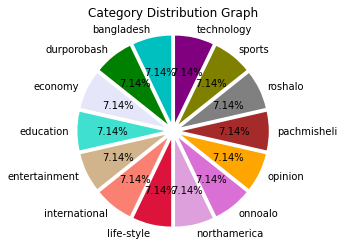

In [14]:
import matplotlib.pyplot as plt

sections = []
y = []
 
labels = []
 
for each_category in selected_category_list:
    sections.append(target.count(each_category))

colors = ['c', 'g', 'lavender', 'turquoise', 'tan', 'salmon', 'crimson', 'plum', 'orchid', 'orange', 'brown', 'gray', 'olive', 'purple']
labels = ['{}'.format(each_category) for each_category in selected_category_list]

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode=[0.1 if i == max(sections) else 0 for i in sections],  # Explode the section with the highest value.
        autopct='%1.2f%%')

# plt.axis('equal')
plt.title('Category Distribution Graph')
plt.show()



In [15]:

for i in range(len(data)):
    if (data[i]['category'] == '22221'):
             print(data[i])
        

{'author': '-1', 'category': '22221', 'category_bn': '২২২২১', 'published_date': '১৫ ফেব্রুয়ারি ২০১৫, ১৯:১৯', 'modification_date': '২৯ ডিসেম্বর ২০১৮, ১৫:১২', 'tag': '-1', 'comment_count': 0, 'title': 'আজকের অনুষ্ঠানের সময়সূচি', 'url': 'http://www.prothom-alo.com/22221/article/452572', 'content': 'প্রতিদিন ঢাকা শহরের বিভিন্ন অনুষ্ঠানের সময়সূচী জানতে আপনার গ্রামীণফোন, রবি, বাংলালিংক, এয়ারটেল ও টেলিটক মোবাইল থেকে টাইপ করুন  START  স্পেস AO এবং পাঠিয়ে দিন 22221 নম্বরে।সার্ভিসটি নিতে  এখানে ক্লিক করুন ∗ সার্ভিসটি বন্ধ করতে টাইপ করুন STOP স্পেস AO এবং পাঠিয়ে দিন 22221 নম্বরে।∗ প্রতিদিন চার্জ ২ টাকা + ভ্যাট, সাপ্লিমেন্টারি ডিউটি ও সারচার্জ প্রযোজ্য'}
{'author': '-1', 'category': '22221', 'category_bn': '২২২২১', 'published_date': '১৫ ফেব্রুয়ারি ২০১৫, ১৯:১৮', 'modification_date': '২৯ ডিসেম্বর ২০১৮, ১৫:১২', 'tag': '-1', 'comment_count': 0, 'title': 'প্রতিদিন আবহাওয়ার খবর', 'url': 'http://www.prothom-alo.com/22221/article/452569', 'content': 'আবহাওয়ার খবর পেতে আপনার গ্রামীণফোন, রবি, বাংলালিংক,

In [16]:

for i in range(len(data)):
    if (data[i]['category'] == '-1'):
             print(data[i])


{'author': '-1', 'category': '-1', 'published_date': '-1', 'modification_date': '-1', 'tag': '-1', 'comment_count': 0, 'title': '-1', 'url': 'http://www.prothom-alo.com/bangladesh/article/23294', 'content': '-1'}
{'author': '-1', 'category': '-1', 'published_date': '-1', 'modification_date': '-1', 'tag': '-1', 'comment_count': 0, 'title': '-1', 'url': 'http://www.prothom-alo.com/international/article/23508', 'content': '-1'}
{'author': '-1', 'category': '-1', 'published_date': '-1', 'modification_date': '-1', 'tag': '-1', 'comment_count': 0, 'title': '-1', 'url': 'http://www.prothom-alo.com/education/article/54658', 'content': '-1'}
{'author': '-1', 'category': '-1', 'published_date': '-1', 'modification_date': '-1', 'tag': '-1', 'comment_count': 0, 'title': '-1', 'url': 'http://www.prothom-alo.com/economy/article/54660', 'content': '-1'}
{'author': '-1', 'category': '-1', 'published_date': '-1', 'modification_date': '-1', 'tag': '-1', 'comment_count': 0, 'title': '-1', 'url': 'http://

# ***Lemmatization***

In [17]:
!pip install bnlp_toolkit
!pip install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer

from bnlp import NLTKTokenizer
from banglakit import lemmatizer as lem
from banglakit.lemmatizer import BengaliLemmatizer

import nltk
from nltk.stem import WordNetLemmatizer

nltk_tokenizer = NLTKTokenizer()
lemmatizer = BengaliLemmatizer()

# text = "আমার সোনার বাংলা, আমি তোমায় ভালবাসি।"
# tokens = nltk_tokenizer.word_tokenize(text)
# lemmatized_text = [lemmatizer.lemmatize(token) for token in tokens]


# Tokenize the list of text.
tokens_list = [nltk_tokenizer.word_tokenize(content) for content in features]

# Apply lemmatization to each token in each list.
lemmatized_tokens_list = []
for tokens in tokens_list:
    lemmatized_tokens = []
    for token in tokens:
        lemmatized_tokens.append(lemmatizer.lemmatize(token))
    lemmatized_tokens_list.append(lemmatized_tokens)

# Join the tokens back into a single string for each text in the list.
# lemmatized_text_list = [' '.join(tokens) for tokens in lemmatized_tokens_list]



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.3 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/banglakit/lemmatizer.git to /tmp/pip-install-me7q5uu2/banglakit-lemmatizer_078cba4209fa4ce498019e1f6f469d3a
  Running command git clone --filter=blob:none --quiet https://github.com/banglakit/lemmatizer.git /tmp/pip-install-me7q5uu2/banglakit-lemmatizer_078cba4209fa4ce498019e1f6f469d3a
  Resolved https://github.com/banglakit/lemmatizer.git to commit f94d8f8dfe06fac70fa151a4606988

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.8/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [18]:
lemmatized_tokens_list[-1]

['সাইকেলতাহমিনা',
 'বেগম',
 'স্বপ্নে',
 'দেখ',
 ',',
 'লিজার',
 'বাবা',
 'একটা',
 'নতুন',
 'সাইকেল',
 'নিয়ে',
 'ঢুকছেন',
 'উঠানে',
 '।',
 'তাঁকে',
 'খুব',
 'হাস্যোজ্জ্বল',
 'আর',
 'সুখী',
 'দেখ',
 '।',
 'লিজার',
 'মাকে',
 'দেখ',
 'পেয়েই',
 'বল',
 ',',
 '‘',
 'লিজার',
 'জন্য',
 'কিনে',
 'আনলাম',
 '।',
 'কত',
 'দিন',
 'ধর',
 'আবদার',
 'কর',
 'মেয়েটা',
 '।',
 '’',
 '‘',
 'কিন্তু',
 'লিজা',
 'তো',
 'নেই',
 '।',
 '-PRON-',
 'যেন',
 'কিছুই',
 'জানো',
 'না',
 '!',
 '’',
 'লিজার',
 'বাবাকে',
 'খানিকটা',
 'বিচলিত',
 'দেখ',
 '।',
 '-PRON-',
 'লিজার',
 'মায়ের',
 'ভুল',
 'ভাঙ',
 'চাইলেন',
 ',',
 '‘',
 '-PRON-',
 'যেটা',
 'বলতেছ',
 ',',
 'সেটা',
 'একটা',
 'দুঃস্বপ্ন',
 'ছিল',
 '।',
 'এখন',
 'সব',
 'ঠিক',
 'হয়ে',
 'গেছে',
 '।',
 '’',
 '‘',
 'কিন্তু',
 'এখন',
 '-PRON-',
 '-PRON-',
 'স্বপ্ন',
 'দেখতেছি',
 'না',
 '?',
 '’',
 '‘',
 '-PRON-',
 '-PRON-',
 ',',
 'দেখো',
 'লিজা',
 'আসতেছে',
 '।',
 '’',
 'স্কুলের',
 'পোশাক',
 'পর',
 'লিজা',
 'বেরোল',
 'ঘর',
 'থেকে',
 '।',
 '-PRON-',
 'উঠানে',
 'এসে',
 'সাইকে

In [19]:
len(features[-1])

3581

# **Label Encoding**

In [20]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

en_target=le.fit_transform(target)

set(en_target)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

# **Split data**
*make train and test data*

In [21]:
from sklearn.model_selection import train_test_split


train_content, test_content, train_category, test_category = train_test_split(lemmatized_tokens_list, en_target, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)


print(len(train_content))
print(len(test_content))

28000
7000


# **Tokenization**

In [22]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(train_content)

list(tokenizer.word_index.items()) [:15] #print first 15

[('<OOV>', 1),
 ('।', 2),
 (',', 3),
 ('-pron-', 4),
 ('কর', 5),
 ('ও', 6),
 ('বল', 7),
 ('না', 8),
 ('.', 9),
 ('’', 10),
 ('‘', 11),
 ('যাওয়া', 12),
 ('থেকে', 13),
 ('এই', 14),
 (')', 15)]

In [23]:
vocabulary_size = len(tokenizer.word_index) + 1
print(vocabulary_size)

487222


# ***Padding***

In [24]:

max_length = 500
truncate_type = 'post'
padding_type = 'post'

train_sequences = tokenizer.texts_to_sequences(train_content)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=truncate_type)

test_sequences = tokenizer.texts_to_sequences(test_content)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=truncate_type)

In [25]:
train_content[-1]
#print(len(train_content[1000]))

['ফিলিপাইনে',
 'ঘূর্ণিঝড়',
 '‘',
 'হাইয়ান',
 '’',
 '-এর',
 'আঘাতে',
 'কমপক্ষে',
 'এক',
 'হাজার',
 '২০০',
 'মানুষ',
 'নিহত',
 'হয়েছে',
 '।',
 '-PRON-',
 'মধ্যে',
 'একটি',
 'শহরেই',
 'নিহত',
 'হয়েছে',
 'সহস্রাধিক',
 'মানুষ',
 '।',
 'আজ',
 'শনিবার',
 'রেডক্রসের',
 'বরাত',
 'দিয়ে',
 'বার্তা',
 'সংস্থা',
 'রয়টার্স',
 'এই',
 'খবর',
 'প্রকাশ',
 'কর',
 '।',
 'প্রাণহানির',
 'সংখ্যা',
 'আরও',
 'বাড়তে',
 'পারে',
 'বল',
 'জানিয়েছে',
 'রেডক্রস।ঘূর্ণিঝড়',
 'হাইয়ানের',
 'কারণে',
 'ফিলিপাইনের',
 'উপকূলবর্তী',
 'এলাকায়',
 'ভূমিধস',
 'ও',
 'রাস্তাঘাট',
 'ভেঙে',
 'পড়',
 'এবং',
 'গাছপালা',
 'রাস্তার',
 'ওপর',
 'ভেঙে',
 'পড়',
 'উদ্ধারকাজ',
 'বিঘ্নিত',
 'হচ্ছে',
 'বল',
 'জানা',
 'গেছে',
 '।',
 'ফিলিপাইনে',
 'রেডক্রসের',
 'মহাসচিব',
 'গেনডোলিন',
 'প্যাং',
 'বল',
 ',',
 'ঘূর্ণিঝড়',
 'হাইয়ান',
 'বিশেষ',
 'কর',
 'দেশটির',
 'কেন্দ্রীয়',
 'লেইট',
 'প্রদেশের',
 'উপকূলবর্তী',
 'এলাকা',
 'ট্যাকলোবানে',
 'আঘাত',
 'হেনেছে',
 '।',
 'এই',
 'অঞ্চল',
 'থেকেই',
 'রেডক্রসের',
 'উদ্ধার',
 'কর্মীরা',
 'প্রায়',
 'এক',
 'হাজার'

In [26]:
# print a single text sequence
print(len(train_sequences[-1]))
print(train_sequences[-1])

329
[14016, 11012, 11, 70692, 10, 886, 5883, 2564, 24, 91, 1237, 110, 614, 52, 2, 4, 36, 28, 11911, 614, 52, 15797, 110, 2, 82, 655, 32982, 3445, 56, 1134, 777, 11227, 14, 339, 206, 5, 2, 11659, 402, 71, 3767, 43, 7, 1130, 487214, 36589, 128, 11241, 34541, 1104, 22159, 6, 6988, 480, 58, 26, 6471, 1560, 96, 480, 58, 23740, 8980, 73, 7, 241, 101, 2, 14016, 32982, 3013, 487215, 487216, 7, 3, 11012, 70692, 153, 5, 867, 1602, 145069, 3052, 34541, 1401, 487217, 1806, 27470, 2, 14, 2800, 226, 32982, 1131, 2832, 199, 24, 91, 2050, 1131, 5, 2, 4, 205, 11270, 2800, 13, 71, 1237, 1492, 2050, 1131, 5, 163538, 1053, 241, 101, 3, 4, 1339, 110, 488, 9975, 751, 13651, 1489, 56, 1560, 96, 2534, 487218, 4592, 2892, 10427, 162, 142, 57533, 31114, 487219, 7, 3, 11, 14, 52513, 857, 16184, 52, 2, 51, 75, 4, 4, 117, 16184, 626, 14590, 13, 6842, 1243, 18136, 1150, 1055, 2403, 21, 2, 10, 241, 101, 3, 11012, 70692, 14016, 1806, 54583, 59, 6415, 233, 22107, 115, 12, 2, 50, 10649, 179, 3038, 13, 241, 101, 3, 867,

In [27]:
import numpy as np

# convert into array
training_padded = np.array(train_padded)
training_labels = np.array(train_category)
testing_padded = np.array(test_padded)
testing_labels = np.array(test_category)

# now the Shape of train content data
training_padded.shape

(28000, 500)

## **Build Model**

In [28]:
model =tf.keras.Sequential([tf.keras.layers.Embedding(input_dim=vocabulary_size,output_dim=14, input_length=max_length),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                            tf.keras.layers.Dense(14, activation='softmax')
])

In [29]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 14)           6821108   
                                                                 
 bidirectional (Bidirectiona  (None, 500, 128)         40448     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 500, 256)         263168    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 500, 256)         394240    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               73984     
 nal)                                                   

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [ ]:
history = model.fit(training_padded, training_labels, epochs= 15, validation_data=(testing_padded, testing_labels), callbacks=[tensorboard_callback])

Epoch 1/25
621/875 [====================>.........] - ETA: 1:04 - loss: 1.9458 - accuracy: 0.3169

In [ ]:
model.save('news_category_lstm_classifier.h5')

# ***Accuracy and Plotting***

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig("LSTM_Accuracy1.png")
files.download('LSTM_Accuracy1.png')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig("LSTM_LOSS1.png")
files.download('LSTM_LOSS1.png')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# make predictions on test set
y_pred = model.predict(testing_padded)

# convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# generate classification report
report = classification_report(testing_labels, y_pred_labels)

# print classification report
print(report)

In [ ]:
# Making testing function
def test(sentence):
    sequences = tokenizer.texts_to_sequences(sentence_1)
    padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=truncate_type)
    pred=model.predict(padded)
    pred_index=np.argmax(pred)
#     print(pred_index)
    return pred_index

In [ ]:
test_content[780]

In [ ]:
selected_category_list[test_category[780]]

In [ ]:
sentence_1=['অগ্নিনিরাপত্তা নিশ্চিত করতে তৈরি পোশাক শিল্প-কারখানায় ব্যবহূত অগ্নিনির্বাপণ যন্ত্রের ওপর শুল্কহার কমানো হয়েছে। এর ফলে ২০১৩-১৪ অর্থবছর থেকে এসব পণ্য আমদানিতে মোট পাঁচ শতাংশ হারে শুল্ক প্রদান করলেই হবে।এত দিন অগ্নিনির্বাপণ যন্ত্রপাতি কিনতে ১২ শতাংশ আমদানি শুল্কসহ ৩৯ দশমিক ৪৭ শতাংশ শুল্ককর প্রযোজ্য ছিল। কিন্তু পোশাকশিল্পে অগ্নিকাণ্ডে হতাহতের ঘটনা বেড়ে যাওয়ায় সরকার এ উদ্যোগ নিয়েছে।']
result=test(sentence_1)
if result is not None:
    print('Text Category is: '+selected_category_list[result])
else:
    print('Model is not working well')

In [ ]:
weights = model.get_layer('embedding').get_weights()[0]
weights.shape

In [ ]:
import matplotlib.pyplot as plt
from google.colab import files

models = ['LSTM', 'Multinomial NB', 'XGBoost']
val_accuracy = [75, 73, 81]

plt.bar(models, val_accuracy, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Precision Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 100)

for i, v in enumerate(val_accuracy):
    plt.text(i, v+2, str(v)+'%', ha='center')

plt.savefig("comparison_Precision.png")
files.download("comparison_Precision.png")
plt.show()